In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/timepass/Car details v3.csv')

# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Remove rows with missing values
data.dropna(inplace=True)

# Or, impute missing values with mean (for numerical columns)
data.fillna(data.mean(), inplace=True)

# One-hot encoding for categorical variables
data = pd.get_dummies(data, columns=['fuel', 'seller_type', 'transmission', 'owner'], drop_first=True)

# Split data into training and testing sets
X = data.drop('selling_price', axis=1)  # Features
y = data['selling_price']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250N

<ipython-input-4-3b3069ebbbdf>:17: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [ ]:
'''
Feature Selection:
© Select the relevant features that you believe will influence the selling
price of a used car. Justify your feature selection choices.
'''

selected_features = [
    "1. Year: Newer cars generally command higher prices due to perceived better condition.",
    "2. Kilometers Driven (km_driven): Lower mileage cars are more valuable due to less wear and tear.",
    "3. Fuel: Type of fuel (e.g., petrol, diesel) influences operating costs and price.",
    "4. Seller Type: Dealers may offer certified cars at higher prices than individual sellers.",
    "5. Transmission: Automatic transmissions are priced higher for their convenience.",
    "6. Owner: First-owner cars are more expensive due to better condition.",
    "7. Mileage: Better fuel efficiency leads to higher selling prices.",
    "8. Engine: Engine size (CC) affects performance, potentially impacting the price.",
    "9. Max Power: Higher power output (bhp) can raise the selling price.",
    "10. Torque: Torque (Nm) influences performance and may impact pricing.",
    "11. Seats: More seating capacity may result in higher selling prices."
]

for feature in selected_features:
    print(feature)


1. Year: Newer cars generally command higher prices due to perceived better condition.
2. Kilometers Driven (km_driven): Lower mileage cars are more valuable due to less wear and tear.
3. Fuel: Type of fuel (e.g., petrol, diesel) influences operating costs and price.
4. Seller Type: Dealers may offer certified cars at higher prices than individual sellers.
5. Transmission: Automatic transmissions are priced higher for their convenience.
6. Owner: First-owner cars are more expensive due to better condition.
7. Mileage: Better fuel efficiency leads to higher selling prices.
8. Engine: Engine size (CC) affects performance, potentially impacting the price.
9. Max Power: Higher power output (bhp) can raise the selling price.
10. Torque: Torque (Nm) influences performance and may impact pricing.
11. Seats: More seating capacity may result in higher selling prices.


In [ ]:
# Linear Regression Model:
print("'year' and 'km_driven' predicting 'selling_price'")

# Import the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Assuming 'year' and 'km_driven' predicting 'selling_price'
X1 = data[['year', 'km_driven']]
y1 = data['selling_price']

# Split the dataset into a training set and a testing set (e.g., 80% training and 20% testing)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Create a Linear Regression model
model1 = LinearRegression()

# Train the Linear Regression model using the training data
model1.fit(X1_train, y1_train)

# You can now use the trained model to make predictions on the test data
y1_pred = model1.predict(X1_test)


'year' and 'km_driven' predicting 'selling_price'


Enter the car's year: 2014
Enter the kilometers driven: 68000


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted Selling Price (Scenario 1): ₹655061.79


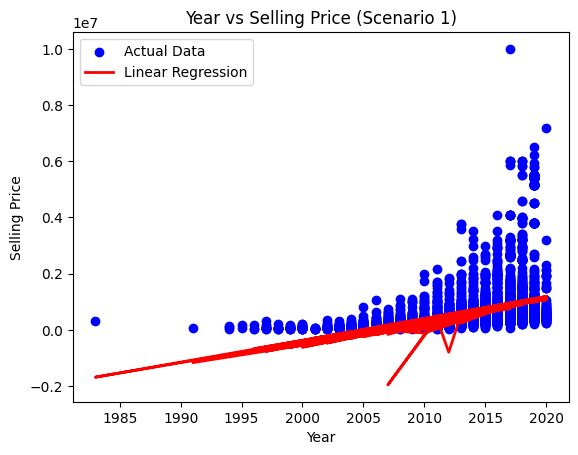

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data = pd.read_csv('/content/drive/MyDrive/timepass/Car details v3.csv')

# Create Linear Regression model for Scenario 1
X1 = data[['year', 'km_driven']]
y1 = data['selling_price']
model1 = LinearRegression()
model1.fit(X1, y1)

# Function to predict selling price based on user input
def predict_selling_price_1(year, km_driven):
    return model1.predict([[year, km_driven]])[0]

# User input for Scenario 1
year_input = int(input("Enter the car's year: "))
km_input = int(input("Enter the kilometers driven: "))

predicted_price_1 = predict_selling_price_1(year_input, km_input)
print(f"Predicted Selling Price (Scenario 1): \u20B9{predicted_price_1:.2f}")


# Plotting the predicted prices for Scenario 1
plt.scatter(data['year'], data['selling_price'], color='blue', label='Actual Data')
plt.plot(data['year'], model1.predict(X1), color='red', linewidth=2, label='Linear Regression')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.title('Year vs Selling Price (Scenario 1)')
plt.legend()
plt.show()


Enter the car's year: 2017
Enter the kilometers driven: 50000


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted Selling Price (Scenario 1): ₹903140.79


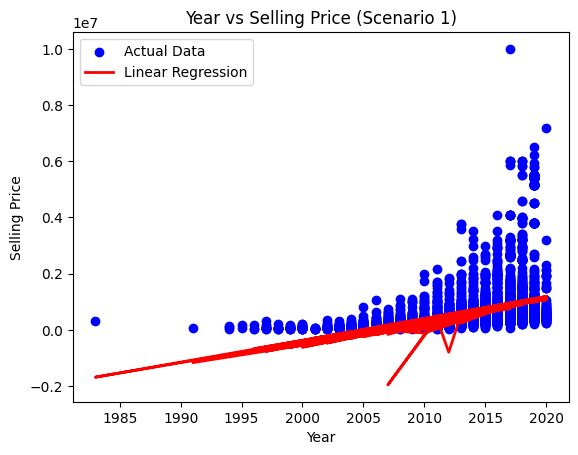

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data = pd.read_csv('/content/drive/MyDrive/timepass/Car details v3.csv')

# Create Linear Regression model for Scenario 1
X1 = data[['year', 'km_driven']]
y1 = data['selling_price']
model1 = LinearRegression()
model1.fit(X1, y1)

# Function to predict selling price based on user input
def predict_selling_price_1(year, km_driven):
    return model1.predict([[year, km_driven]])[0]

# User input for Scenario 1
year_input = int(input("Enter the car's year: "))
km_input = int(input("Enter the kilometers driven: "))

predicted_price_1 = predict_selling_price_1(year_input, km_input)
print(f"Predicted Selling Price (Scenario 1): \u20B9{predicted_price_1:.2f}")

# Plotting the predicted prices for Scenario 1
plt.scatter(data['year'], data['selling_price'], color='blue', label='Actual Data')
plt.plot(data['year'], model1.predict(X1), color='red', linewidth=2, label='Linear Regression')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.title('Year vs Selling Price (Scenario 1)')
plt.legend()
plt.show()


Enter the car's year: 2014
Enter the kilometers driven: 69000


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted Selling Price: ₹655178.93


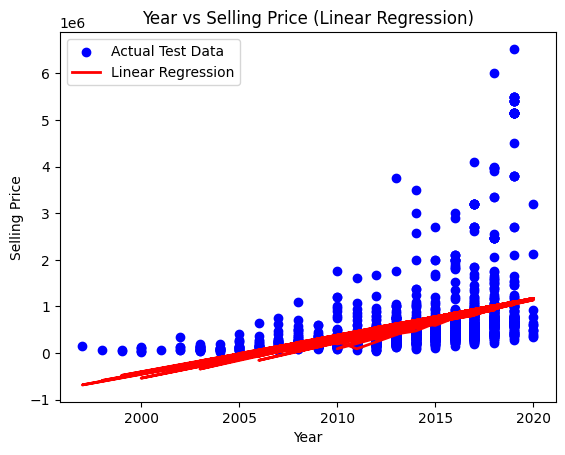

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/timepass/Car details v3.csv')

# Split the dataset into training and testing sets (80% training, 20% testing)
X = data[['year', 'km_driven']]
y = data['selling_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Function to predict selling price based on user input
def predict_selling_price(year, km_driven):
    return model.predict([[year, km_driven]])[0]

# User input
year_input = int(input("Enter the car's year: "))
km_input = int(input("Enter the kilometers driven: "))

predicted_price = predict_selling_price(year_input, km_input)
print(f"Predicted Selling Price: \u20B9{predicted_price:.2f}")

# Plotting the predicted prices
plt.scatter(X_test['year'], y_test, color='blue', label='Actual Test Data')
plt.plot(X_test['year'], model.predict(X_test), color='red', linewidth=2, label='Linear Regression')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.title('Year vs Selling Price (Linear Regression)')
plt.legend()
plt.show()


In [ ]:
print("The above is complete Linear Regression Model with 80% training and 20% testing")

The above is complete Linear Regression Model with 80% training and 20% testing


In [38]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Load your dataset from a CSV file (replace 'your_dataset.csv' with your file path)
data = pd.read_csv('/content/drive/MyDrive/timepass/Car details v3.csv')

# Function to clean and extract numeric values from a string
def extract_numeric(text):
    if isinstance(text, str):
        try:
            # Extract numeric values from the string
            numeric_value = float(re.findall(r'\d+\.\d+|\d+', text)[0])
            return numeric_value
        except (ValueError, IndexError):
            pass
    return None

# Apply the function to the 'mileage', 'engine', 'max_power', and 'torque' columns
data['mileage'] = data['mileage'].apply(extract_numeric)
data['engine'] = data['engine'].apply(extract_numeric)
data['max_power'] = data['max_power'].apply(extract_numeric)
data['torque'] = data['torque'].apply(extract_numeric)

# Selecting relevant features for the model
features = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats']
X = data[features]
y = data['selling_price']

# Impute missing values in the dataset
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the dataset into a training set and a testing set (e.g., 80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the Linear Regression model using the training data
model.fit(X_train, y_train)

# Function to predict selling price based on user input
def predict_selling_price(features_input):
    return model.predict([features_input])[0]

# User input for car features
year_input = int(input("Enter the car's year: "))
km_input = int(input("Enter the kilometers driven: "))
mileage_input = float(input("Enter the car's mileage: "))
engine_input = float(input("Enter the engine size (CC): "))
max_power_input = float(input("Enter the max power (bhp): "))
torque_input = float(input("Enter the torque (Nm): "))
seats_input = int(input("Enter the number of seats: "))

# Predict selling price based on user input
user_features = [year_input, km_input, mileage_input, engine_input, max_power_input, torque_input, seats_input]
predicted_price = predict_selling_price(user_features)
if (predicted_price <= 0):
  predicted_price = predicted_price * -1;
  print(f"Predicted Selling Price: ₹{predicted_price:.2f}")
else:
  print(f"Predicted Selling Price: ₹{predicted_price:.2f}")



Enter the car's year: 2000
Enter the kilometers driven: 80000
Enter the car's mileage: 20.9
Enter the engine size (CC): 1895
Enter the max power (bhp): 23
Enter the torque (Nm): 200
Enter the number of seats: 5
Predicted Selling Price: ₹805780.19


Enter the car's year: 2007
Enter the kilometers driven: 96321
Enter the car's mileage: 56
Enter the engine size (CC): 2589
Enter the max power (bhp): 10
Enter the torque (Nm): 236
Enter the number of seats: 9
Predicted Selling Price: ₹839022.56


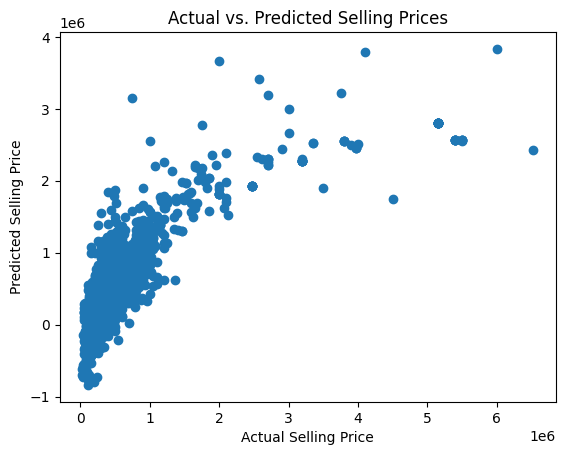

In [40]:
import pandas as pd
import re
import matplotlib.pyplot as plt  # Import matplotlib for plotting
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Load your dataset from a CSV file (replace 'your_dataset.csv' with your file path)
data = pd.read_csv('/content/drive/MyDrive/timepass/Car details v3.csv')

# Function to clean and extract numeric values from a string
def extract_numeric(text):
    if isinstance(text, str):
        try:
            # Extract numeric values from the string
            numeric_value = float(re.findall(r'\d+\.\d+|\d+', text)[0])
            return numeric_value
        except (ValueError, IndexError):
            pass
    return None

# Apply the function to the 'mileage', 'engine', 'max_power', and 'torque' columns
data['mileage'] = data['mileage'].apply(extract_numeric)
data['engine'] = data['engine'].apply(extract_numeric)
data['max_power'] = data['max_power'].apply(extract_numeric)
data['torque'] = data['torque'].apply(extract_numeric)

# Selecting relevant features for the model
features = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats']
X = data[features]
y = data['selling_price']

# Impute missing values in the dataset
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the dataset into a training set and a testing set (e.g., 80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the Linear Regression model using the training data
model.fit(X_train, y_train)

# Function to predict selling price based on user input
def predict_selling_price(features_input):
    return model.predict([features_input])[0]

# User input for car features
year_input = int(input("Enter the car's year: "))
km_input = int(input("Enter the kilometers driven: "))
mileage_input = float(input("Enter the car's mileage: "))
engine_input = float(input("Enter the engine size (CC): "))
max_power_input = float(input("Enter the max power (bhp): "))
torque_input = float(input("Enter the torque (Nm): "))
seats_input = int(input("Enter the number of seats: "))

# Predict selling price based on user input
user_features = [year_input, km_input, mileage_input, engine_input, max_power_input, torque_input, seats_input]
predicted_price = predict_selling_price(user_features)
if (predicted_price <= 0):
  predicted_price = predicted_price * -1;
  print(f"Predicted Selling Price: ₹{predicted_price:.2f}")
else:
  print(f"Predicted Selling Price: ₹{predicted_price:.2f}")

# Plot a scatter plot of predicted vs. actual selling prices from the test set
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs. Predicted Selling Prices")
plt.show()
